In [1]:
#Capstone Two: modeling
#Created on October 20, 2022

In [2]:
#Import necessary packages
import pandas as pd
pd.options.display.max_columns=10000
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#create an empty list of results
allresults = []

In [4]:
#Import and view train data set using read_csv
df = pd.read_csv('../data/clean_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1455,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1456,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

In [5]:
#view data set
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1455,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1456,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

In [6]:
#use pd.get_dummies on data frame to create unique columns for each categorical result
df = pd.get_dummies(df)

In [7]:
#view shape
df.shape

(1459, 401)

In [8]:
#Look at the data summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [9]:
#import test csv to and view test data set
test = pd.read_csv('../data/clean_test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,None,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,N

In [10]:
#use pd.get_dummies on data frame to create unique columns for each categorical result
test = pd.get_dummies(test)

In [11]:
test.shape

(1459, 1529)

In [12]:
#Import LinearRegression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [13]:
#help(LinearRegression)

In [14]:
#print(LinearRegression.__doc__)

In [15]:
#create an empty list of featurenames
featurenames = []

In [16]:
#assign "LotArea" to variable
featurename = 'LotArea'
df[featurename] = df['LotArea']

In [17]:
test[featurename] = test['LotArea']

In [18]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#create a data frame of all results
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
e = y_pred-y
RMSE = np.sqrt(np.mean((e)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.0586,LotArea,LinearRegression


In [19]:
print(model.score(X, y))
print(model.score(test[featurenames], y))

0.07152989701244228
-0.012081627176117715


Text(0, 0.5, 'Actual price')

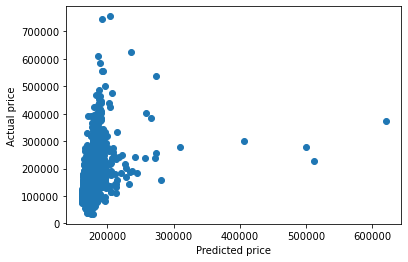

In [20]:
#Plot the predicted Sale Price with actual sale prices
plt.scatter(y_pred, df['SalePrice'])
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

Text(0, 0.5, 'Actual price')

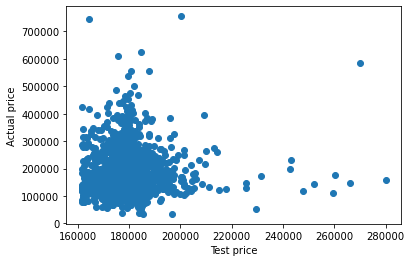

In [21]:
#Plot the test Sale Price with actual sale prices
plt.scatter(y_pred2, df['SalePrice'])
plt.xlabel('Test price')
plt.ylabel('Actual price')

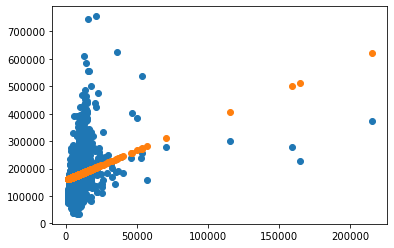

In [22]:
#Plot Lot Area and Sale price
#Add the line of fit
plt.scatter(df['LotArea'], df['SalePrice'])
plt.scatter(df['LotArea'], y_pred) 

{'RMSE': 76546.71381485718, 'RMSEtest': 79919.05860018599, 'featurenames': 'LotArea', 'model': 'LinearRegression'}


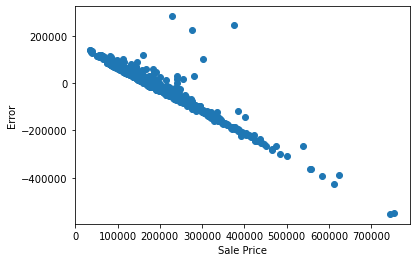

In [23]:
#Plot the Sale price against the error
plt.scatter(df['SalePrice'], e)
plt.xlabel('Sale Price')
plt.ylabel('Error')
print(allresults[0])

Text(0, 0.5, 'Error')

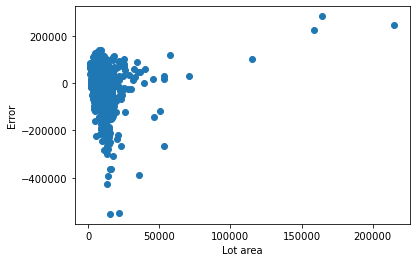

In [24]:
#Plot the Lot Area against the error and label axes
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')
#Larger homes are underestimated on Sale price

In [25]:
#calculate the square of 'LotArea' and assign it to a new column "LotArea_squared"
df['LotArea_squared'] = df['LotArea'] ** 2

In [26]:
#view data frame
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [27]:
#assign 'LotArea_squared' values to df[featurename] in train data set
featurename = 'LotArea_squared'
df[featurename] = df['LotArea_squared']

In [28]:
#assign 'LotArea_squared' values to df[featurename] in test data set
test[featurename] = test['LotArea'] ** 2

In [29]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
e = y_pred-y
RMSE = np.sqrt(np.mean((e)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression


In [30]:
pd.set_option('display.max_colwidth', 0)

In [31]:
print(model.score(X, y))
print(model.score(test[featurenames], y))

0.14235792279727888
-0.09590147167688201


Text(0, 0.5, 'Error')

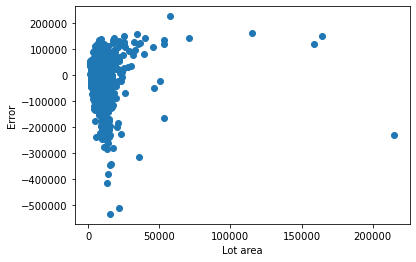

In [32]:
#plot Lot area against error
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

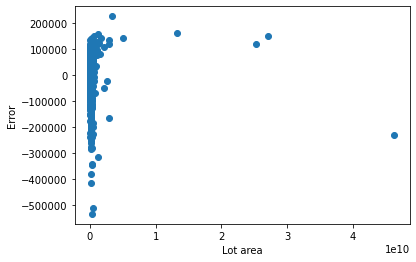

In [33]:
#plot Lot area against error
plt.scatter(df['LotArea_squared'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')

Text(0, 0.5, 'Actual price')

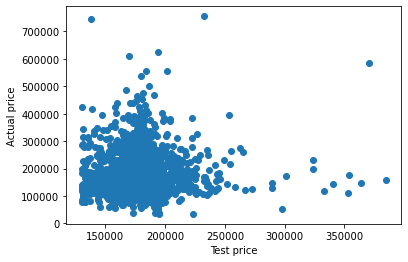

In [34]:
#Plot the test Sale Price with actual sale prices
plt.scatter(y_pred2, df['SalePrice'])
plt.xlabel('Test price')
plt.ylabel('Actual price')

In [35]:
#create a threshold of Lot area less than 50000 for train data set
featurename = 'LotArea_lt_50000'
df[featurename] = df['LotArea'] < 50000

In [36]:
#create a threshold of Lot area less than 50000 for test data set
test[featurename] = test['LotArea'] < 50000

In [37]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

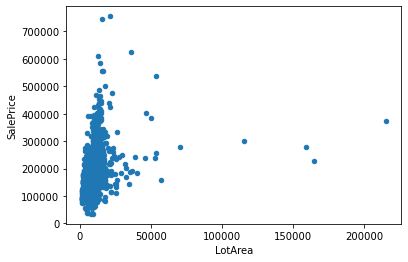

In [38]:
#Plot LotArea and Sale Price
df.plot(kind='scatter', x='LotArea', y='SalePrice')

In [39]:
#use 'LotFrontage' as next feature name in train set
featurename = 'LotFrontage'
df[featurename] = df['LotFrontage'] 

In [40]:
#use 'LotFrontage' as next feature name in test set
test[featurename] = test['LotFrontage'] 

In [41]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression


Text(0, 0.5, 'Error')

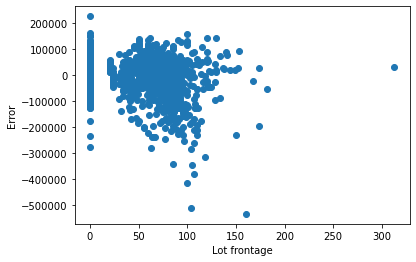

In [42]:
#plot LotFrontage against error
plt.scatter(df['LotFrontage'], e) #residual
plt.xlabel('Lot frontage')
plt.ylabel('Error')

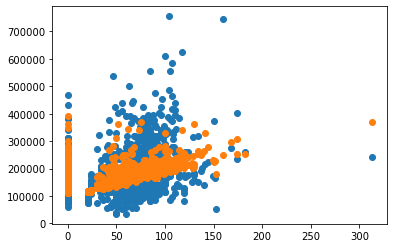

In [43]:
#Plot Lot Area and Sale price
#Add the line of fit
plt.scatter(df['LotFrontage'], df['SalePrice'])
plt.scatter(df['LotFrontage'], y_pred) 

In [44]:
#use 'LotFrontage_gt_0' as next feature name in train set
featurename = 'LotFrontage_gt_0'
df[featurename] = df['LotFrontage'] > 0

In [45]:
#use 'LotFrontage' as next feature name in test set
test[featurename] = test['LotFrontage'] > 0

In [46]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression


In [47]:
print(model.score(X, y))
print(model.score(test[featurenames], y))

0.1905915855726259
-0.18384804871049232


In [48]:
#use 'LotFrontage' as next feature name in train set
featurename = 'LotFrontage_lt_150'
df[featurename] = df['LotFrontage'] < 150

In [49]:
#use 'LotFrontage' as next feature name in test set
test[featurename] = test['LotFrontage'] < 150

In [50]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
#use same block of code for all RandomForest models
#calculate train and test RMSE using the same features used for previous LinearRegression model
#add these results to all results data frame
X=df[featurenames]
y=df['SalePrice']
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier


Text(0, 0.5, 'Actual price')

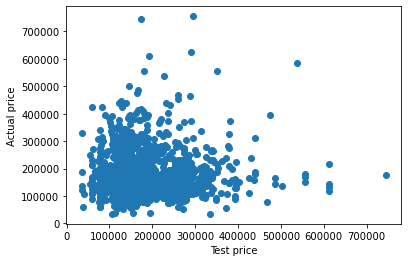

In [53]:
#Plot the test Sale Price with actual sale prices
plt.scatter(y_pred2, df['SalePrice'])
plt.xlabel('Test price')
plt.ylabel('Actual price')

In [54]:
#add TotalBsmtSF to feature name for train set
featurename = 'TotalBsmtSF'
df[featurename] = df['TotalBsmtSF']

In [55]:
#add TotalBsmtSF to feature name for test set
test[featurename] = test['TotalBsmtSF']

In [56]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression


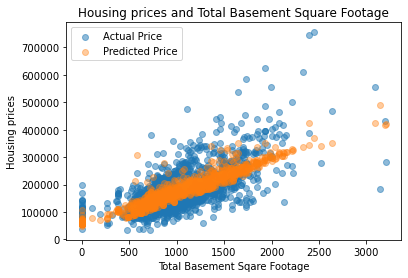

In [57]:
#Plot TotalBsmtSF and Sale price
#Add the line of fit
actual = plt.scatter(df['TotalBsmtSF'], df['SalePrice'], alpha = 0.5)
predicted = plt.scatter(df['TotalBsmtSF'], y_pred, alpha = 0.4)
plt.legend((actual, predicted), 
          ('Actual Price', 'Predicted Price'), loc='upper left')
plt.title('Housing prices and Total Basement Square Footage')
plt.xlabel('Total Basement Sqare Footage')
plt.ylabel('Housing prices')
plt.savefig('../images/basement.png', bbox_inches="tight", facecolor='white')

Text(0, 0.5, 'Error')

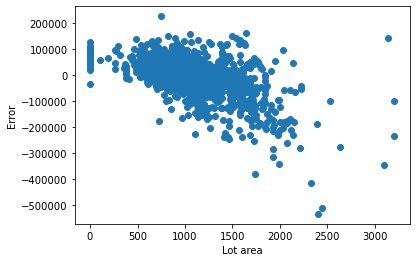

In [58]:
#plot Lot area against error
plt.scatter(df['TotalBsmtSF'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')

In [59]:
#add TotalBsmtSF less than 2000 to feature name for train set
featurename = 'TotalBsmtSF_lt_2000'
df[featurename] = df['TotalBsmtSF'] < 2000

In [60]:
#add TotalBsmtSF to feature name for test set
test[featurename] = test['TotalBsmtSF'] < 2000

In [61]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression


In [62]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression


In [63]:
#add YearBuilt to feature name for train set
featurename = 'YearBuilt'
df[featurename] = df['YearBuilt'] 

In [64]:
#add YearBuilt to feature name for test set
test[featurename] = test['YearBuilt']

In [65]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression


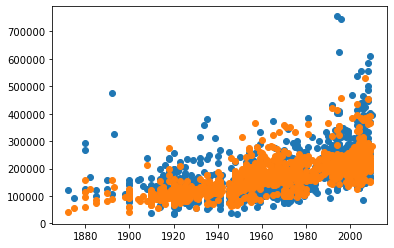

In [66]:
#Plot Lot Area and Sale price
#Add the line of fit
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.scatter(df['YearBuilt'], y_pred) 

Text(0, 0.5, 'Error')

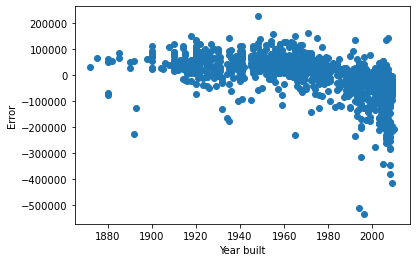

In [67]:
#plot LotFrontage against error
plt.scatter(df['YearBuilt'], e) #residual
plt.xlabel('Year built')
plt.ylabel('Error')

In [68]:
#add YearBuilt less than 1990 to feature name for train set
featurename = 'YearBuilt_lt_1990'
df[featurename] = df['YearBuilt'] < 1990

In [69]:
#add YearBuilt less than 1990 to feature name for test set
test[featurename] = test['YearBuilt'] < 1990

In [70]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression


In [71]:
#add OverallQual to feature name for train set
featurename = 'OverallQual'
df[featurename] = df['OverallQual'] 

In [72]:
#add OverallQual to feature name for test set
test[featurename] = test['OverallQual']

In [73]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression


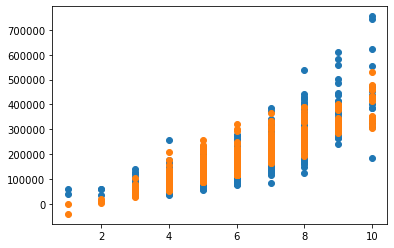

In [74]:
#Plot TotalBsmtSF and Sale price
#Add the line of fit
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.scatter(df['OverallQual'], y_pred)

Text(0, 0.5, 'Error')

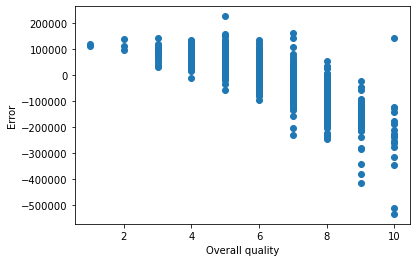

In [75]:
#plot LotFrontage against error
plt.scatter(df['OverallQual'], e) #residual
plt.xlabel('Overall quality')
plt.ylabel('Error')

In [76]:
#larger error where overall quality < 8

In [77]:
#add OverallQual less than 9 to feature name for train set
featurename = 'OverallQual_lt_9'
df[featurename] = df['OverallQual'] < 9

In [78]:
#add OverallQual less than 9 to feature name for test set
test[featurename] = test['OverallQual'] < 9

In [79]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression


In [80]:
#add n_estimators=2 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2)
rfparams = '(n_estimators=2)'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression,NaN
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression,NaN
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression,NaN
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier,NaN
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression,NaN
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression,NaN
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression,NaN


In [81]:
#use n_jobs=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_jobs=5)
rfparams = '(n_jobs=5)'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression,NaN
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression,NaN
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression,NaN
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier,NaN
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression,NaN
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression,NaN
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression,NaN


In [82]:
#use max_depth=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_jobs=5)
rfparams = '(max_depth=5)'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression,NaN
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression,NaN
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression,NaN
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier,NaN
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression,NaN
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression,NaN
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression,NaN


In [83]:
#add n_jobs=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2, n_jobs=5)
rfparams = 'n_estimators=2', 'n_jobs=5'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression,NaN
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression,NaN
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression,NaN
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier,NaN
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression,NaN
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression,NaN
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression,NaN


In [84]:
#add max_depth=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2, max_depth=5)
rfparams = 'n_estimators=2', 'max_depth=5'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression,NaN
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression,NaN
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression,NaN
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier,NaN
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression,NaN
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression,NaN
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression,NaN


In [85]:
#install dataframe-image
#pip install dataframe-image

In [86]:
#!pip install jinja2==3.0.0

In [87]:
import dataframe_image as dfi

In [88]:
#add n_jobs=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2, max_depth=5, n_jobs=5)
rfparams = 'n_estimators=2', 'max_depth=5', 'n_jobs=5'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84373.200915,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85650.352243,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression,NaN
4,71470.438467,86435.185894,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0",LinearRegression,NaN
5,71469.968406,86432.358822,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",LinearRegression,NaN
6,21500.869917,110525.165728,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150",RandomForestClassifier,NaN
7,58099.385054,95527.341760,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF",LinearRegression,NaN
8,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000",LinearRegression,NaN
9,57641.957486,95437.131745,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,LotFrontage_gt_0,LotFrontage_lt_150,TotalBsmtSF,TotalBsmtSF_lt_2000,TotalBsmtSF_lt_2000",LinearRegression,NaN


In [89]:
final = pd.DataFrame(allresults)
dfi.export(final, '../images/models.png')

/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [90]:
np.std(df['SalePrice'])

79440.61342361722

In [91]:
#The standard deviation of sale prices in the training data set is +- 79,400 from the mean. The RMSE test score
#The best model is model 18 RandomForestClassifier(n_estimators=2, max_depth=5)
#my final RandomForestClassfier model RMSE train score was equal to 61315
#and the RMSE test score was equal to 94076.
#The standard deviation of Sale Price falls in between these two numbers